In [120]:
# FS acoustic wave propagation plots using classical sum of sinusoids solution, 2017-01-17

# NOTE THIS IS NOT FINISHED !!!

%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [121]:
cs = 450              # A speed of sound. For air it's 343 m/s.
nu = 1               # A frequency for the wave in Hz: cycles/s.

omega = 2*np.pi*nu    # Angular frequency in radians/s.
lambd = cs/nu         # Wavelength in m
k = (2*np.pi) / lambd   # Wavenumber in radians/mS

one_sec_time = 1
one_sec_linear_distance = one_sec_time * cs
one_sec_angular_distance = one_sec_time * omega

time_samples = 1000  
distance_samples = cs

ost_range = np.linspace(0, one_sec_time*5000, time_samples)
osld_range = np.linspace(0, one_sec_linear_distance, distance_samples)

amplitude = 1
damping_cf = 0.001
spring_stiffness =1
mass = 2
phase = 1
zeta = (damping_cf/(np.sqrt(spring_stiffness*mass)))*0.5

In [122]:
# Check they all look correct

print(one_sec_linear_distance)
print(omega)
print(lambd)
print(k * one_sec_linear_distance)
print(zeta)

450
6.283185307179586
450.0
6.283185307179586
0.000353553390593


In [123]:
def Pa(t):
    return (PaL(t) + PaR(t))

def PaR(t):
    return ((1-R) * np.cos((k * osld_range) - (omega * t)))

def PaL(t):
    return (R * np.cos((k * osld_range) + (omega * t)))
def UnderDamped(t):
    return amplitude*(np.exp(-zeta*omega*t))*np.cos(np.sqrt(1-zeta*zeta)*omega*t-phase)
    #return 0#np.cos(omega*t)

def mapp(array,func):
    result=np.empty(len(array))
    for i in range(len(array)):
        result[i]=func(array[i])
    return result
        

<IPython.core.display.Javascript object>


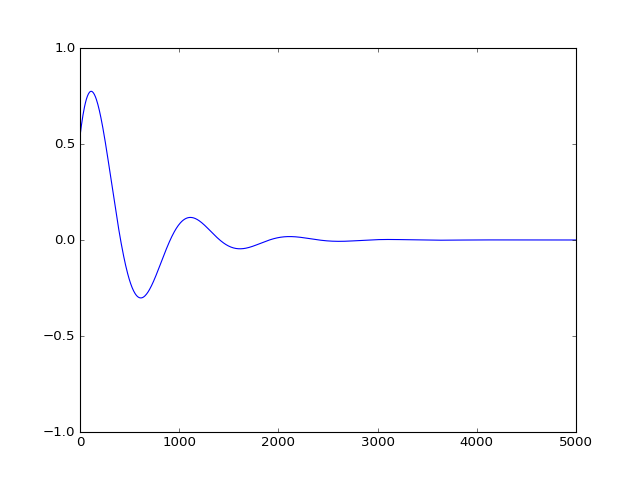

<IPython.core.display.Javascript object>


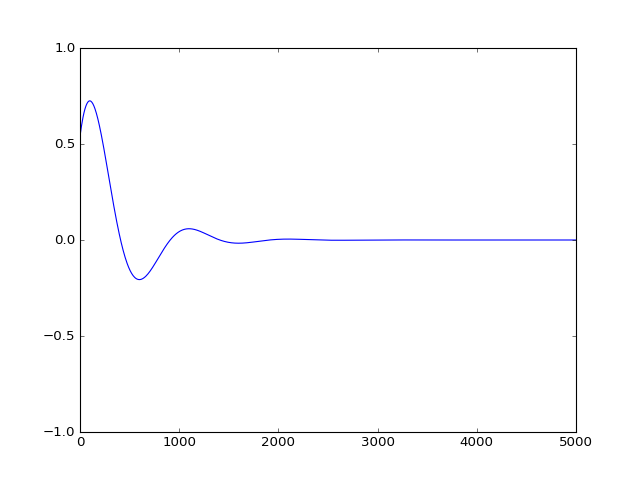

<IPython.core.display.Javascript object>


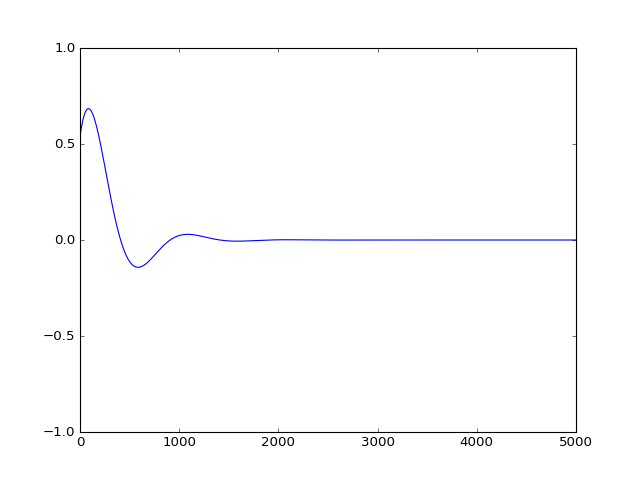

<IPython.core.display.Javascript object>


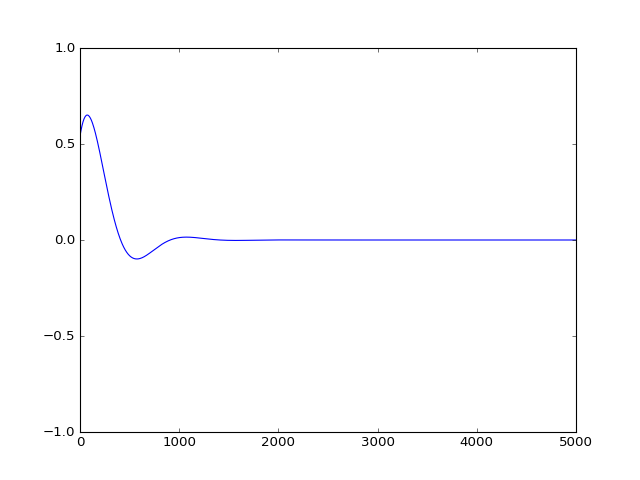

<IPython.core.display.Javascript object>


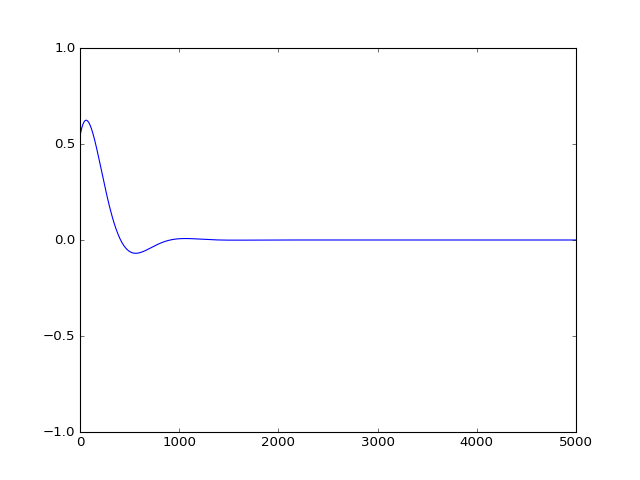

<IPython.core.display.Javascript object>


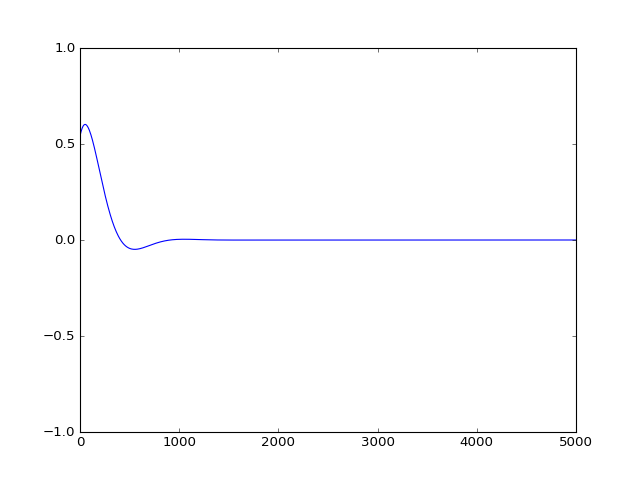

<IPython.core.display.Javascript object>


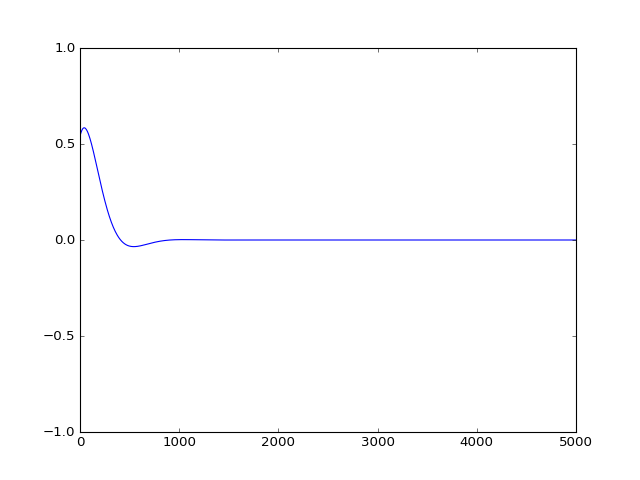

<IPython.core.display.Javascript object>


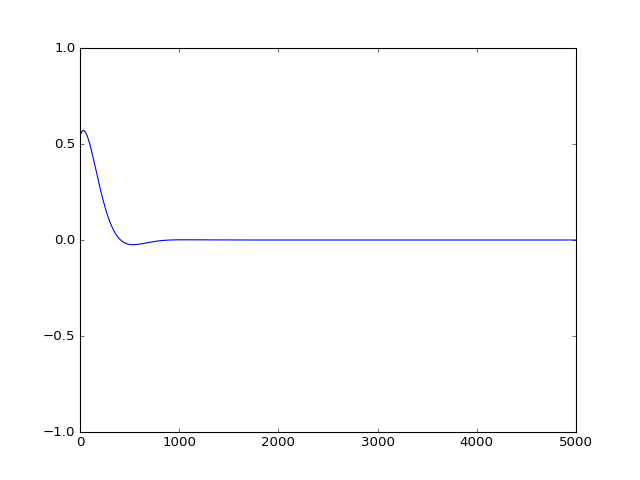

<IPython.core.display.Javascript object>


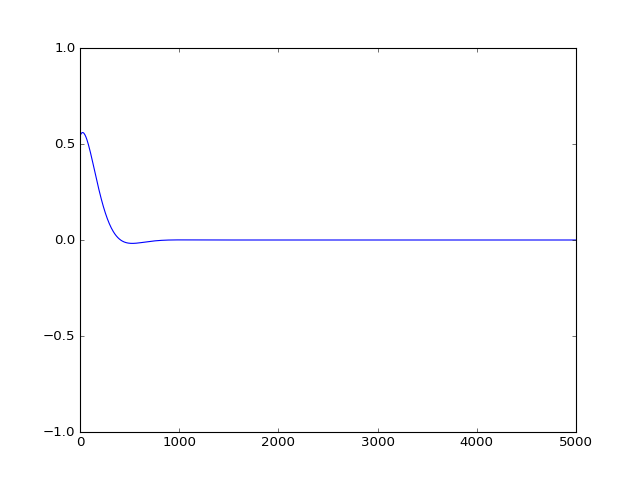

<IPython.core.display.Javascript object>


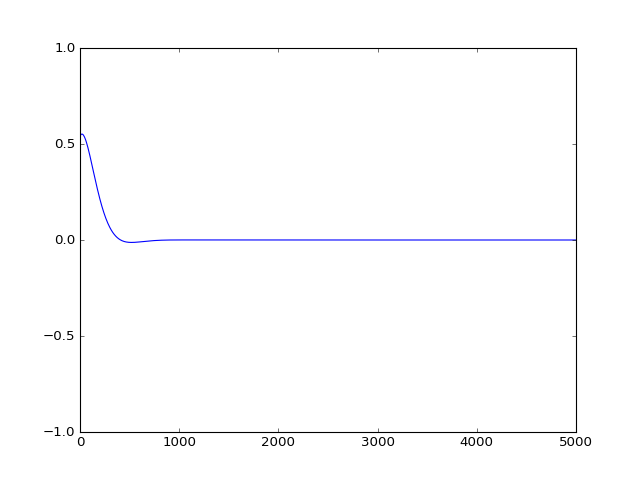

<IPython.core.display.Javascript object>


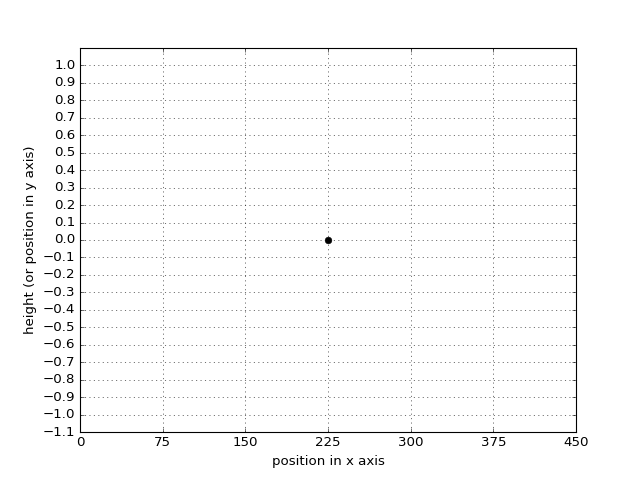

In [124]:

for i in range(0,10):
    zeta = 0.0003+i*0.0001
    values = mapp(ost_range,UnderDamped)
    fig0= plt.figure(i+3)
    ax0 = plt.axes(xlim=(0,ost_range[len(ost_range)-1]),ylim=(-amplitude,amplitude))
    plt.plot(ost_range,values)
    plt.show()

zeta =0.0003 #reset zeta 
abs_values = np.abs(mapp(ost_range,UnderDamped)) #get the abs values of UnderDamped for the animation
fig = plt.figure(2)
ax =  plt.axes(xlim=(0, one_sec_linear_distance), ylim=(-1.1, +1.1))

ax.set_xlabel('position in x axis')
ax.set_ylabel('height (or position in y axis)')

ax.set_yticks(np.arange(-1.1,1.1,0.1))
ax.set_xticks([0,75, 150, 225, 300, 375, 450])

plt.grid()

# initialization function: plot the background of each frame

line1, = ax.plot([], [], lw=2, c='b') # Comma needed to specify first element of a returned list
line2, = ax.plot([], [], lw=2, c='g') # ... instead of the list itself, even if there's only
line3, = ax.plot([], [], lw=2, c='r') # ... one element. plot() Documentation doesn't make this clear. 

dots, =  ax.plot([], [], 'ko')

def init():
    line1.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    dots.set_data([], [])
    
    return line1, line2, line3, dots

# animation function.  This is called sequentially

def animate(i):
    dots.set_data([225],abs_values[i])
    return dots


In [125]:
R = 0.333

# call the animator.  blit=True means only re-draw the parts that have changed.

anim = animation.FuncAnimation(fig, animate, ost_range, init_func=init, blit=True, repeat=False)

plt.show()

